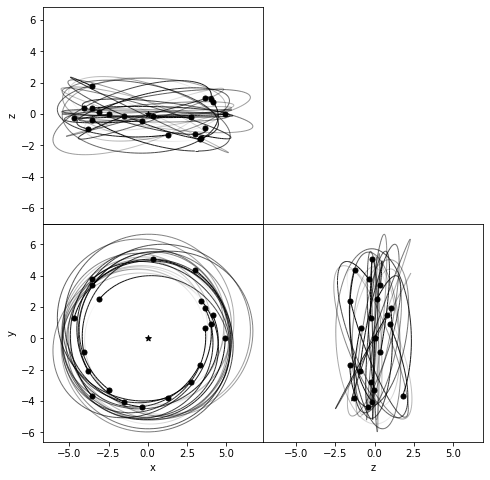

In [9]:
import rebound
import numpy as np

### DEFINITIONS

radeg = np.pi/180

def add_L4(sim, number):
    a_rand = 5.2*np.random.uniform(0.9,1.1,size=number)
    e_rand = np.random.uniform(0,.25,size=number)
    i_rand = np.random.uniform(0,30,size=number)*radeg
    o_rand = np.random.uniform(0,360,size=number)*radeg
    w_rand = np.random.uniform(0,360,size=number)*radeg
        
    for i in range(number):
        sem = a_rand[i]
        ecc = e_rand[i]
        icl = i_rand[i]
        Ome = o_rand[i]
        ome = w_rand[i]
        has = 'L4 {0}'.format(i)
        sim.add(m=0, primary=sim.particles['Sun'], a=sem, e=ecc, inc=icl, Omega=Ome, omega=ome, hash=has)
    return

def add_L5(sim, number):
    a_rand = 5.2*np.random.uniform(0.9,1.1,size=number)
    e_rand = np.random.uniform(0,.25,size=number)
    i_rand = np.random.uniform(0,30,size=number)*radeg
    o_rand = np.random.uniform(0,360,size=number)*radeg
    w_rand = np.random.uniform(0,360,size=number)*radeg
        
    for i in range(number):
        sem = a_rand[i]
        ecc = e_rand[i]
        icl = i_rand[i]
        Ome = o_rand[i]
        ome = w_rand[i]
        has = 'L5 {0}'.format(i)
        sim.add(m=0, primary=sim.particles['Sun'], a=sem, e=ecc, inc=icl, Omega=Ome, omega=ome, hash=has)
    return

###########################
###########################
###########################

### SIMULATION

###########################
###########################
###########################

num_L4 = 10
num_L5 = num_L4
t_tot = 100000

sim = rebound.Simulation()

M0 = 1
num_tr = num_L4 + num_L5

sim.add(m=M0,x=0, y=0, z=0, vx=0, vy=0, vz=0, hash='Sun')
add_L4(sim, num_L4)
add_L5(sim, num_L5)
sim.add(m=9.543e-4, a=5.2, e=.04839, inc=.022689, Omega=0, omega=0, hash='jupiter')

sim.integrator = 'whfast'
sim.dt = 0.5
sim.move_to_com()

ps = sim.particles
fig = rebound.OrbitPlot(sim, slices=True)

Nout = 100000
times = np.linspace(0,t_tot,Nout)

x_sol = np.zeros(Nout); y_sol = np.zeros(Nout); z_sol = np.zeros(Nout)
x_sol[0] = ps['Sun'].x
y_sol[0] = ps['Sun'].y
z_sol[0] = ps['Sun'].z

x_jup = np.zeros(Nout); y_jup = np.zeros(Nout); z_jup = np.zeros(Nout)
x_jup[0] = ps['jupiter'].x
y_jup[0] = ps['jupiter'].y
z_jup[0] = ps['jupiter'].z

a_jup = np.zeros(Nout)
e_jup = np.zeros(Nout) 
i_jup = np.zeros(Nout)
pmjup = np.zeros(Nout)
lmjup = np.zeros(Nout)

a_jup[0] = ps['jupiter'].a
e_jup[0] = ps['jupiter'].e
i_jup[0] = ps['jupiter'].inc
pmjup[0] = ps['jupiter'].pomega
lmjup[0] = ps['jupiter'].l

a_vals = np.zeros((num_tr, Nout))
e_vals = np.zeros((num_tr, Nout))
i_vals = np.zeros((num_tr, Nout))
pmvals = np.zeros((num_tr, Nout))
omvals = np.zeros((num_tr, Nout))
o_vals = np.zeros((num_tr, Nout))
lmvals = np.zeros((num_tr, Nout))

x_vals = np.zeros((num_tr, Nout))
y_vals = np.zeros((num_tr, Nout))
z_vals = np.zeros((num_tr, Nout))

for moon in range(num_L4):
    a_vals[moon,0] = ps['L4 {0}'.format(moon)].a
    e_vals[moon,0] = ps['L4 {0}'.format(moon)].e
    i_vals[moon,0] = ps['L4 {0}'.format(moon)].inc
    lmvals[moon,0] = ps['L4 {0}'.format(moon)].l
    pmvals[moon,0] = ps['L4 {0}'.format(moon)].pomega
    omvals[moon,0] = ps['L4 {0}'.format(moon)].Omega
    o_vals[moon,0] = ps['L4 {0}'.format(moon)].omega
    x_vals[moon,0] = ps['L4 {0}'.format(moon)].x
    y_vals[moon,0] = ps['L4 {0}'.format(moon)].y
    z_vals[moon,0] = ps['L4 {0}'.format(moon)].z

for moon in range(num_L5):
    a_vals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].a
    e_vals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].e
    i_vals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].inc
    lmvals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].l
    pmvals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].pomega
    omvals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].Omega
    o_vals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].omega
    x_vals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].x
    y_vals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].y
    z_vals[moon + num_L4,0] = ps['L5 {0}'.format(moon)].z

In [10]:
%%time

###########################
###########################
###########################

### RUNNING

###########################
###########################
###########################

for i, time in enumerate(times):
    sim.integrate(time)

    sim.move_to_com()

    x_sol[i] = ps['Sun'].x
    y_sol[i] = ps['Sun'].y
    z_sol[i] = ps['Sun'].z

    x_jup[i] = ps['jupiter'].x
    y_jup[i] = ps['jupiter'].y 
    z_jup[i] = ps['jupiter'].z
    a_jup[i] = ps['jupiter'].a
    e_jup[i] = ps['jupiter'].e
    i_jup[i] = ps['jupiter'].inc
    pmjup[i] = ps['jupiter'].pomega
    lmjup[i] = ps['jupiter'].l

    for moon in range(num_L4):
        a_vals[moon,i] = ps['L4 {0}'.format(moon)].a
        e_vals[moon,i] = ps['L4 {0}'.format(moon)].e
        i_vals[moon,i] = ps['L4 {0}'.format(moon)].inc
        lmvals[moon,i] = ps['L4 {0}'.format(moon)].l
        pmvals[moon,i] = ps['L4 {0}'.format(moon)].pomega
        omvals[moon,i] = ps['L4 {0}'.format(moon)].Omega
        o_vals[moon,i] = ps['L4 {0}'.format(moon)].omega
        x_vals[moon,i] = ps['L4 {0}'.format(moon)].x
        y_vals[moon,i] = ps['L4 {0}'.format(moon)].y
        z_vals[moon,i] = ps['L4 {0}'.format(moon)].z

    for moon in range(num_L5):
        a_vals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].a
        e_vals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].e
        i_vals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].inc
        lmvals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].l
        pmvals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].pomega
        omvals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].Omega
        o_vals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].omega
        x_vals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].x
        y_vals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].y
        z_vals[moon + num_L4,i] = ps['L5 {0}'.format(moon)].z

i_vals/= radeg
i_jup /= radeg

CPU times: user 3min 14s, sys: 406 ms, total: 3min 14s
Wall time: 3min 14s


In [12]:
import matplotlib.pyplot as plt

In [29]:
def tisserand(a, e, i, a_p):
    term1 = a_p/a 
    coeff = 2*np.cos(i)
    term2 = np.sqrt(a*(1-np.power(e,2))/a_p)
    return term1 + coeff*term2

def lums_array(x):
    # for input array of time values, approximate log(L_star) (in log(L_sol)) at those times
    y = np.zeros_like(x)
    for i, time in enumerate(x):
        if (time <= 1.113e10):
            y[i] = 1.05
        elif (1.113e10 < time <= 1.1225e10):
            y[i] = 1.45 + ((1.45 - 1.1)/(1.1225e10 - 1.1135e10))*(time - 1.1225e10)
        elif (1.1225e10 < time <= 1.125e10):
            y[i] = 1.45
        elif (1.125 < time <= 1.1336e10):
            y[i] = 1.35 + .1*1.002**((time - 1.125e10)/58000)
        elif (1.1336e10 < time <= 1.142e10):
            y[i] = 1.673
        elif (1.142e10 < time <= 1.14397e10):
            y[i] = 3.198e-9*time - 34.85
        elif (1.14397e10 < time <= 1.14479e10):
            y[i] = 1.736 + 0.032*1.5**((time - 1.14455e10)/360000)
        elif (1.14479e10 < time <= 1.1462e10):
            y[i] = 2.15 + 0.00021*1.5**((time - 1.1444e10)/870000)
        elif (1.1462e10 < time <= 1.14632e10):
            y[i] = 3.5 + (.43/0.0001e10)*(time - 1.1463e10)
        elif (1.14632e10 < time <= 1.14636e10):
            y[i] = 2.3*((time - 1.1463e10)/45000)**(-0.3)
        elif (1.14636e10 < time <= 1.14654715e10):
            y[i] = .2 + ((.2 - 1.05)/(1.14654715e10 - 1.14636e10))*(time - 1.14654715e10)
        elif (1.14654715e10 < time):
            y[i] = .2
    return y 

def roch2(x,y,M1,M2,a):
    q = M2/M1
    x /= a
    y /= a
    s1 = np.sqrt(x**2 + y**2)
    s2 = np.sqrt((x-1)**2 + y**2)
    
    term1 = 2/(s1*(1+q))
    term2 = 2*q/(s2*(1+q))
    term3 = (x - q/(1+q))**2
    term4 = y**2
    return term1 + term2 + term3 + term4

def cart_to_pol(x,y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y,x)
    return r, phi

def pol_to_cart(r,phi):
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return x, y

def L45(msun,mjup):
    u2 = mjup/(msun+mjup)
    
    x_L4 = 0.5 - u2
    x_L5 = x_L4
    
    y_L4 = np.sqrt(3)/2
    y_L5 = -y_L4
    
    return np.array([x_L4,x_L5]), np.array([y_L4,y_L5])

def L45_nonnorm(xjup,yjup,xsun,ysun):
    phi_jup = np.arctan2(yjup,xjup)
    
    phi_L4 = phi_jup + np.pi/3
    phi_L5 = phi_jup - np.pi/3
    
    xsep = (xsun - xjup)
    ysep = (ysun - yjup)
    
    r_jupsol = np.sqrt(xsep**2 + ysep**2)
    
    x_L4 = r_jupsol*np.cos(phi_L4)
    x_L5 = r_jupsol*np.cos(phi_L5)
    y_L4 = r_jupsol*np.sin(phi_L4)
    y_L5 = r_jupsol*np.sin(phi_L5)
    
    return np.array([x_L4,x_L5]), np.array([y_L4,y_L5])

def hill(a,e,m,M):
    return a*(1-e)*np.power(m/(3*M),1/3)

def separatrix(msun, mjup, asun, ajup):
    # masses are in units of solar mass
    # distances are in units of jupiter's distance from the origin
    
    delta = 0.001
    x1 = np.arange(-1.2, 1.2, delta)
    y1 = np.arange(-1.2, 1.2, delta)
    X1, Y1 = np.meshgrid(x1, y1)

    z1 = roch2(X1,Y1,msun,mjup,ajup)

    u2 = mjup/(msun+mjup)
    u1 = 1 - u2
    alph = (u2/3*u1)**(1/3)
    
    l1 = ajup -(alph - (1/3)*alph**2 - (1/9)*alph**3 - (23/81)*alph**4)
    l2 = ajup + alph + (1/3)*alph**2 - (1/9)*alph**3 - (31/81)*alph**4
    l3 = asun + 1 - (7/12)*(u2/u1) + (7/12)*(u2/u1)**2 - (13223/20736)*(u2/u1)**3

    P1 = roch2(l1,0,msun,mjup,1)
    P2 = roch2(l2,0,msun,mjup,1)
    P3 = roch2(-l3,0,msun,mjup,1)

    Jconsts = np.array([P3, P2, P1])
    
    return X1, Y1, z1, Jconsts

def sep_lag_plot(time, tit, ast_x, ast_y):
    R_jup = np.sqrt(jup_x[time]**2 + jup_y[time]**2)
    r_sun = np.sqrt(sol_x[time]**2 + sol_y[time]**2)
    separ = R_jup + r_sun

    r_jup = R_jup/separ
    r_sun /= separ

    msol = sol_m[time]
        
    X1, Y1, Z1, lines1 = separatrix(msol, 9.543e-4, r_sun, r_jup)

    x_jup = jup_x[time]/separ
    y_jup = jup_y[time]/separ

    x_sol = sol_x[time]/separ
    y_sol = sol_y[time]/separ

    x_ast = ast_x.T[time,:]/separ
    y_ast = ast_y.T[time,:]/separ

    L45_x, L45_y = L45(msol,9.543e-4)

    ast_r, ast_phi = cart_to_pol(x_ast,y_ast)
    sol_r, sol_phi = cart_to_pol(x_sol,y_sol)
    jup_r, jup_phi = cart_to_pol(x_jup,y_jup)

    ast_phi -= jup_phi
    sol_phi -= jup_phi
    jup_phi -= jup_phi

    x_ast, y_ast = pol_to_cart(ast_r,ast_phi)
    x_sol, y_sol = pol_to_cart(sol_r,sol_phi)
    x_jup, y_jup = pol_to_cart(jup_r,jup_phi)

    fig, ax = plt.subplots(figsize=(10,10))

    ax.contour(X1,Y1,Z1,lines1, colors='k', alpha=.2)
    ax.scatter(L45_x,L45_y, c='k', lw=3,s=150, marker="x",zorder=10)
    ax.scatter(x_ast[:num_L4],y_ast[:num_L4],c="r",alpha=0.3)
    ax.scatter(x_ast[num_L4:],y_ast[num_L4:],c="b",alpha=0.3)
    ax.scatter(x_sol,y_sol, c="gold",s=300,zorder=10)
    ax.scatter(x_jup,y_jup, c="peru",s=200,zorder=10)

    ax.vlines(0,-1.2,1.2,colors='k',alpha=0.2)
    ax.hlines(0,-1.2,1.2,colors='k',alpha=0.2)
    ax.set_aspect("equal")
    ax.set_ylim(-1.2,1.2)
    ax.set_xlim(-1.2,1.2)
    ax.set_xlabel(r"au / $a_{jup}$", fontsize=16)
    ax.set_ylabel(r"au / $a_{jup}$", fontsize=16)
    ax.set_title(tit, fontsize=16)
    fig.show()
    #fig.savefig("troj3-ast-on-separatrix-start.png", dpi=300)
    return

def r_pol(r,psi,M1,M2,a):
    q = M2/M1
    z = np.zeros((len(psi),len(r)))
    for i, phi in enumerate(psi):
        x_ = r*np.cos(phi)
        y_ = r*np.sin(phi)
        x = x_/a
        y = y_/a
        s1 = np.sqrt(x**2 + y**2)
        s2 = np.sqrt((x-1)**2 + y**2)
    
        term1 = 2/(s1*(1+q))
        term2 = 2*q/(s2*(1+q))
        term3 = (x - q/(1+q))**2
        term4 = y**2
        z[i] = term1 + term2 + term3 + term4
    return z

In [30]:
ast_d = np.array((a_vals, e_vals, i_vals, pmvals, lmvals, x_vals, y_vals))
jup_d = np.array((a_jup, e_jup, i_jup, pmjup, lmjup, x_jup, y_jup, z_jup))
sol_d = np.array((x_sol, y_sol, z_sol))

In [31]:
num_asts = len(ast_d[0,:,0])
half = int(num_asts/2)
print(num_asts)

20


In [32]:
ast_a = ast_d[0]; ast_e = ast_d[1]; ast_i = ast_d[2]; ast_p = ast_d[3]
ast_l = ast_d[4]; ast_x = ast_d[5]; ast_y = ast_d[6]

jup_a = jup_d[0]; jup_e = jup_d[1]; jup_i = jup_d[2]; jup_p = jup_d[3]
jup_l = jup_d[4]; jup_x = jup_d[5]; jup_y = jup_d[6]

sol_m = np.ones(len(times)); sol_x = sol_d[0]; sol_y = sol_d[1]; sol_z = sol_d[2]

L45x, L45y = L45_nonnorm(jup_x,jup_y,sol_x,sol_y)
L4_xs = L45x[0]; L4_ys = L45y[0]
L5_xs = L45x[1]; L5_ys = L45y[1]
jhill = hill(jup_a,jup_e,9.546e-4,sol_m)

dist4 = np.sqrt((ast_x[:half] - L4_xs)**2 + (ast_y[:half] - L4_ys)**2)
dist5 = np.sqrt((ast_x[half:] - L5_xs)**2 + (ast_y[half:] - L5_ys)**2)

ast_meda = np.median(ast_a,axis=0)
dst_jall = np.sqrt((ast_x - jup_x)**2 + (ast_y - jup_y)**2)

i_dif = np.zeros_like(ast_i)
i_int = ast_i[:,0]
for i in range(len(times)):
    i_dif[:,i] = ast_i[:,i] - i_int
    
phi_vals = np.linspace(-np.pi,np.pi,500)
Z = r_pol(jup_a,phi_vals,sol_m,9.546e-4,jup_a)
Pot = np.flip(Z,1)

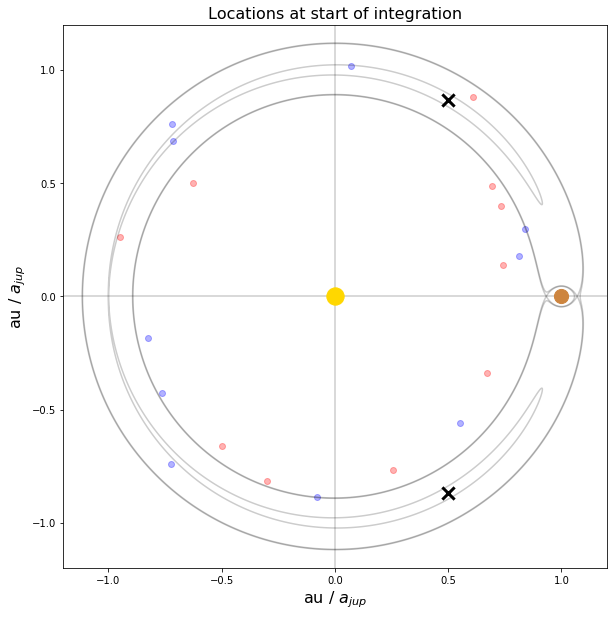

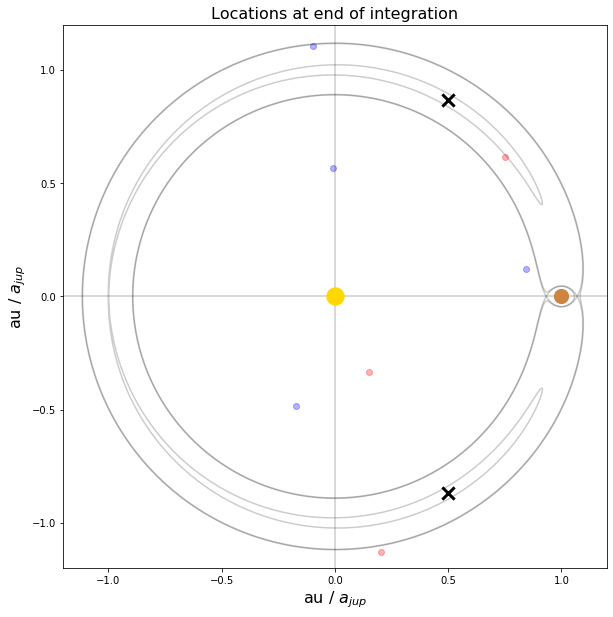

In [36]:
sep_lag_plot(0,"Locations at start of integration",ast_x, ast_y)
sep_lag_plot(Nout-1,"Locations at end of integration",ast_x, ast_y)

In [50]:
indices = []
for i in range(num_asts):
    it = 0
    while it < Nout:
        a_focus = ast_a[i,it]
        a_media = 5.2
        if a_focus > a_media + 1:
            indices.append(i)
            break
        elif a_focus < a_media - 1:
            indices.append(i)
            break
        else:
            it += 1
            
idx = np.array(indices)
ndx = np.array(list(set(range(num_asts)) - set(indices)))

print("Number of escapees:     ", len(indices))
pct = len(indices)/num_asts
print('Number / Total Asts:     %0.2f' %pct)
od4 = sum(np.where(idx <= half, 1, 0))
pc4 = od4/len(idx)
print("Number from L4:         ", od4)
print("Num. from L4 / Escapes:  %0.2f" %pc4)
print("Asts that don't escape:           ", ndx)

Number of escapees:      19
Number / Total Asts:     0.95
Number from L4:          10
Num. from L4 / Escapes:  0.53
Asts that don't escape:            [5]


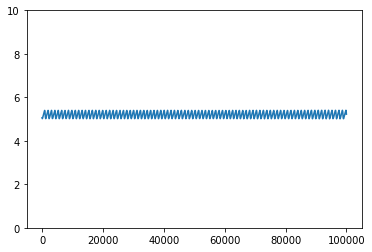

In [51]:
plt.plot(times, ast_a[ndx].T)
plt.ylim(0,10)
plt.show()

In [57]:
print(ast_d[:,ndx,0])

[[ 5.05870764]
 [ 0.11650966]
 [22.76472859]
 [ 0.64618074]
 [ 0.64618071]
 [ 3.42793341]
 [ 2.41230029]]
